# Подготовка данных или Feature [Preprocessing](https://neptune.ai/blog/data-preprocessing-guide)

Здесь мы рассмотрим несколько важных моментов связанных с подготовкой данных к обучению.

In [44]:
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

# Feature Engineering (Создание новых признаков)

Под этим словосочетанием подразумевают создание и подготовку признаков объектов, чтобы они лучше подходили под алгоритмы и давали наилучший результат. Рассмотрим пример концентрических окружностей.

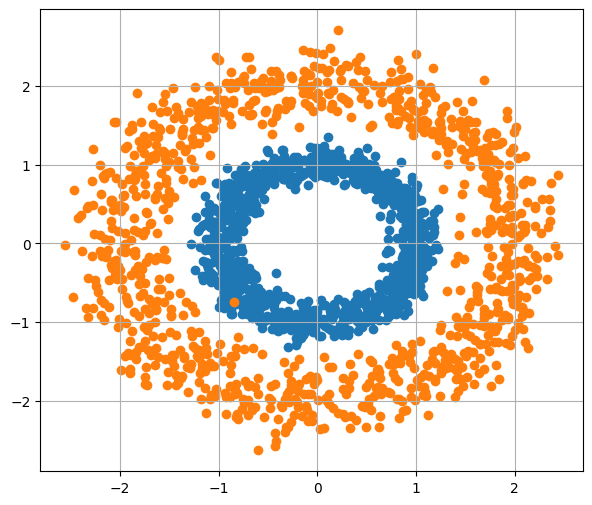

In [45]:
num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

In [46]:
circle

array([[ 1.20304317, -0.01915452],
       [ 0.92351067, -0.29777413],
       [ 0.93389942,  0.07607666],
       ...,
       [ 0.99121782, -0.127786  ],
       [ 1.04421402,  0.07463246],
       [ 0.97663062,  0.1733532 ]])

Давайте попробуем классифицировать их деревом

In [47]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf = DTC()
clf.fit(X, y)
clf.tree_.max_depth

9

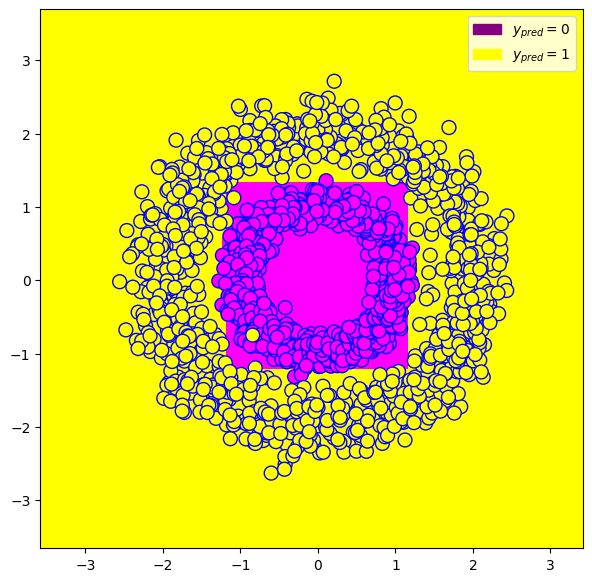

In [48]:
from utils import plot_model
plot_model(X, y, clf)

Глубина дерева - 9, несмотря на такую простую с первого взгляда классификацию. Можно ли что-то с этим сделать?

А давайте добавим радиус в наши данные.

In [52]:
r = X[:,0]**2 + X[:,1]**2
X_new = np.hstack([X, r.reshape(-1,1)])

In [56]:
r.reshape(-1,1)

(2000,)

In [58]:
X_new

array([[ 1.20304317, -0.01915452,  1.44767977],
       [ 0.92351067, -0.29777413,  0.94154139],
       [ 0.93389942,  0.07607666,  0.87795578],
       ...,
       [ 1.98243564, -0.255572  ,  3.9953681 ],
       [ 2.08842805,  0.14926491,  4.38381173],
       [ 1.95326125,  0.3467064 ,  3.93543482]])

In [59]:
clf2 = DTC()
clf2.fit(X_new, y)
clf2.tree_.max_depth

3

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y).mean()

0.9705

In [63]:
cross_val_score(clf2, X_new, y).mean()

0.999

Добавив логичный признак, который мы предположили, мы сумели классифицировать данные гораздо более простой моделью, да еще и с намного лучшим качеством. Этот процесс и называется `Feature Engineering`.

## Линейная Регрессия и Polynomial Features

Собственно, с помощью создания фич мы можем заставить работать линейную регрессию. Вернемся к примеру с прошлого семинара.

In [64]:
def plot_reg(X, y, clf_dtc, X_test, dim=0):
    clf_dtc.fit(X, y)
    Y_test = clf_dtc.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)
    plt.plot(X_test[:,dim], Y_test, color='r', alpha=1)
    plt.grid()

In [65]:
def f(x):
    return np.sqrt(x) + np.sin(x)

vf = np.vectorize(f)
rng = np.random.RandomState(1)

X_reg = np.arange(0, 10, 0.2)[:, np.newaxis]
y_reg = vf(X_reg) + (rng.rand(50)[:,np.newaxis] / 2)#добавляем шумы

/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_85336/2693303752.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)


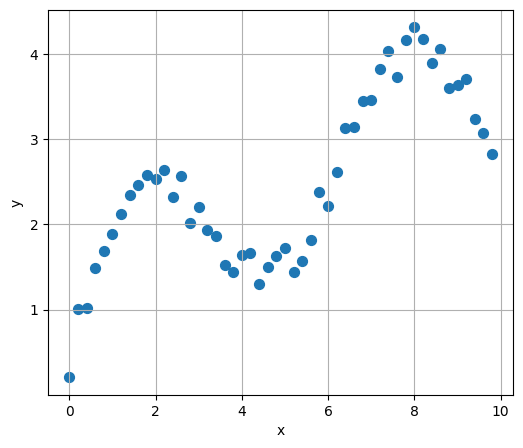

In [66]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_85336/1450849381.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)


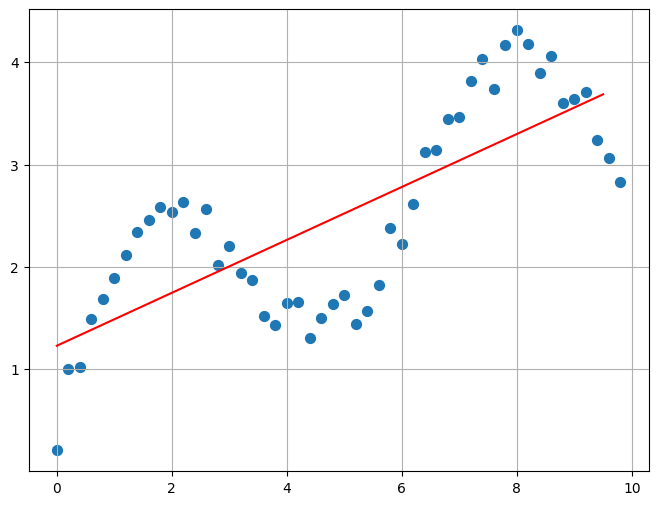

In [20]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()
X_test = np.arange(0, 10, 0.5)[:,np.newaxis]
plot_reg(X_reg, y_reg, reg_lr, X_test)

Теперь добавим функции второй, третей и четвертых степеней.

In [67]:
X_reg

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [2. ],
       [2.2],
       [2.4],
       [2.6],
       [2.8],
       [3. ],
       [3.2],
       [3.4],
       [3.6],
       [3.8],
       [4. ],
       [4.2],
       [4.4],
       [4.6],
       [4.8],
       [5. ],
       [5.2],
       [5.4],
       [5.6],
       [5.8],
       [6. ],
       [6.2],
       [6.4],
       [6.6],
       [6.8],
       [7. ],
       [7.2],
       [7.4],
       [7.6],
       [7.8],
       [8. ],
       [8.2],
       [8.4],
       [8.6],
       [8.8],
       [9. ],
       [9.2],
       [9.4],
       [9.6],
       [9.8]])

In [78]:
X_reg_new = np.hstack([X_reg, X_reg**4])
X_test_new = np.hstack([X_test, X_test**4])

/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_85336/1450849381.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)


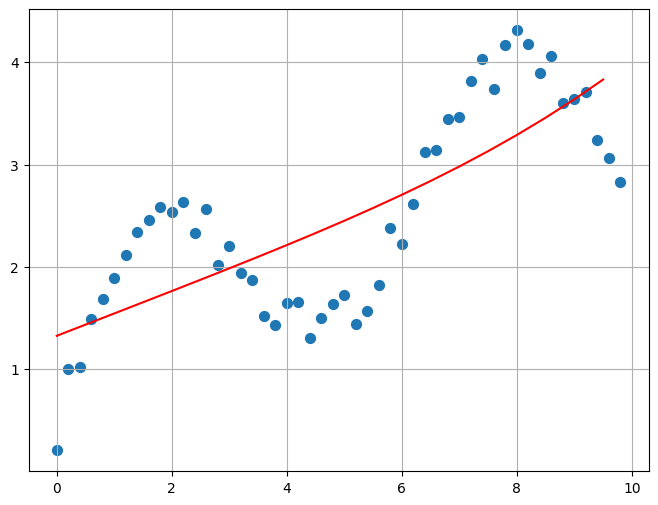

In [79]:
reg_lr = LinearRegression()
plot_reg(X_reg_new, y_reg, reg_lr, X_test_new)

В изначальной линейной регрессии мы находимся в пространстве линейных алгоритмов:
$$a(x) = a_0x_0 + a_1x_1 + \ldots a_nx_n$$
    
Но теперь место фич у нас заняли полиномиальные функции и мы получили степенную функцию:

$$a(x) = a_0 + a_1x^1 + \ldots a_nx^n$$

Чтобы не делать это вручную, есть механизм `PolynomialFeatures`

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8)

X_reg2 = poly.fit_transform(X_reg)
X_test2 = poly.fit_transform(X_test)

In [86]:
X_reg2.shape

(50, 9)

/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_85336/1450849381.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)


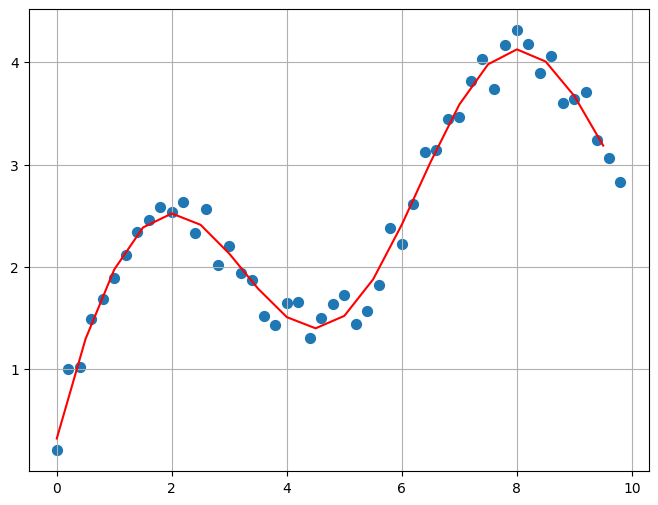

In [87]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
plot_reg(X_reg2, y_reg, reg_lr, X_test2, dim=1)

С другой стороны мы можем догадаться, что тут не степенные функции и использовать те функции, которые нужны.

In [28]:
X_reg3 = np.hstack([X_reg, X_reg**0.5, np.sin(X_reg)])
X_test3 = np.hstack([X_test, X_test**0.5, np.sin(X_test)])

/var/folders/fm/931yzsgx4t52sj8yn6jcw0gc0000gn/T/ipykernel_85336/1450849381.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,dim], y, cmap='bwr', s=50, alpha=1)


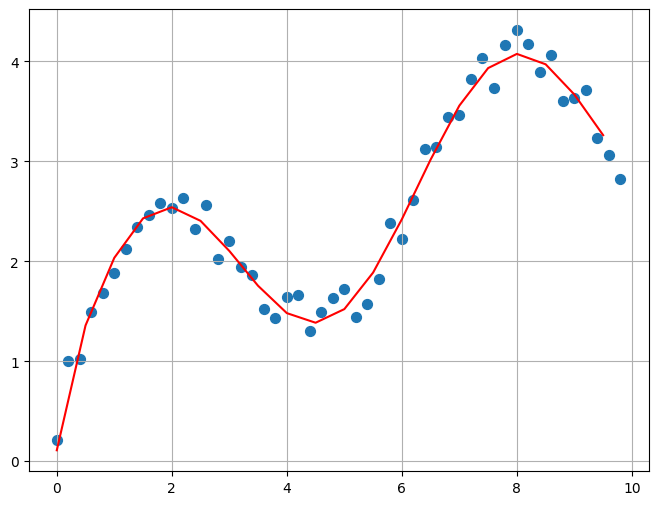

In [29]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
plot_reg(X_reg3, y_reg, reg_lr, X_test3, dim=0)

# Масштабирование (Scaling)

Рассмотрим такую ситуацию: у вас есть данные о дороге с 2мя признаками: `длина участка дороги` и `толщина слоя асфальта`. Обе величины даются в одной метрике - метры. И нам нужно бинарно классифицировать качество дороги: `хорошая`,`плохая`.

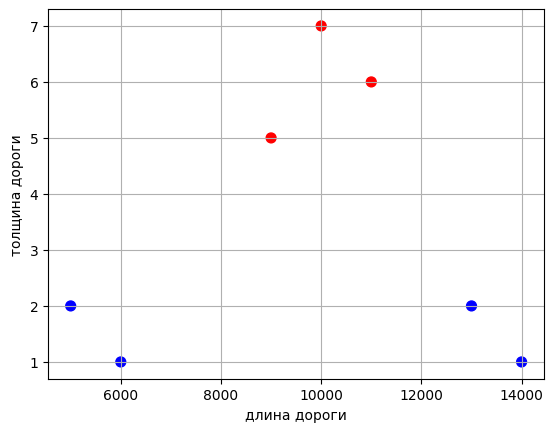

In [88]:
X = np.array([[10000, 7],[11000, 6],[9000, 5],[5000, 2],[6000, 1],[13000, 2],[14000, 1]])
y = np.array([1,1,1,0,0,0,0]) # 1 - хорошие, 0 - плохие

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Из логики нам будет очевидно, что первый признак практически бесполезен, а второй играет ключевую роль. Но, если запустить KNN или любой другой `метрический` алгоритм, мы получим обратную ситуацию, признак который в абсолюте больше - **важнее**, чем признак, который очень мало отличается.  

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(3)
model.fit(X,y)
X_bad = [[10000, 1]] 
y_pred = model.predict(X_bad)
X_new = np.vstack([X, X_bad])
y_new = np.hstack([y, y_pred])


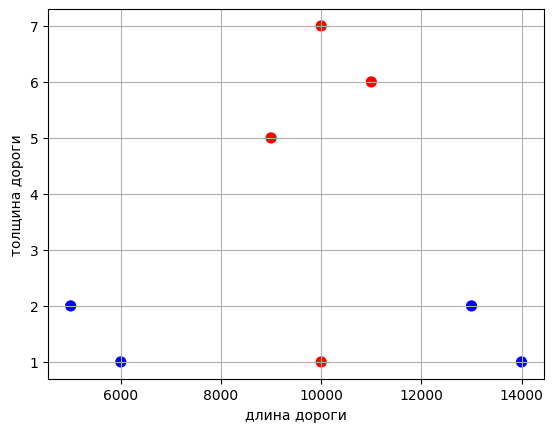

In [90]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Почему новая точка классифицировалась неправильно? Потому что, с точки зрения эвклидовой метрики, до `хороших` ей действительно `ближе`.

$$\rho((6000, 7), (10000, 1)) = \sqrt{(6000 - 10000)^2 + (7-1)^2} = $$
 $$ = \sqrt{6^2} << \rho((6000, 1), (10000, 1)) = \sqrt{4000^2 + (1-1)^2}$$

Чтобы справиться с этой проблемой важно `масштабировать` численные признаки, чтобы они были корректно сравнимы.

Есть разные подходы к масштабированию, например:
* Нормализация (MinMax Scaling) $$x^* = \frac{x-x_{min}}{x_{max} - x_{min}}$$
* Стандартизация (Standart Scaling) $$x^* = \frac{x-\mu}{\sigma}$$, где $\mu$ - среднее, а $\sigma$ - стандартное отклонение

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stan = StandardScaler().fit(X)
minmax = MinMaxScaler().fit(X)
X_st = stan.transform(X)
X_minmax = minmax.transform(X)

Метод `fit` подбирает параметры масштабирования, а метод `transform` непосредственно преобразует значения. 

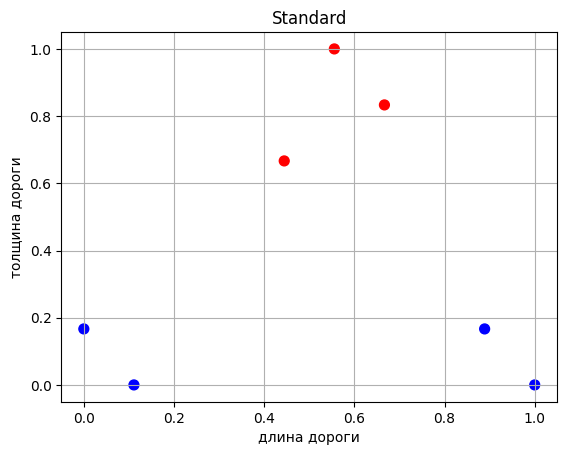

In [96]:
plt.scatter(X_minmax[:,0], X_minmax[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.title('Standard')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

И вот теперь мы можем верно классифицировать данные, не забыв трансформировать точку, которую предсказываем

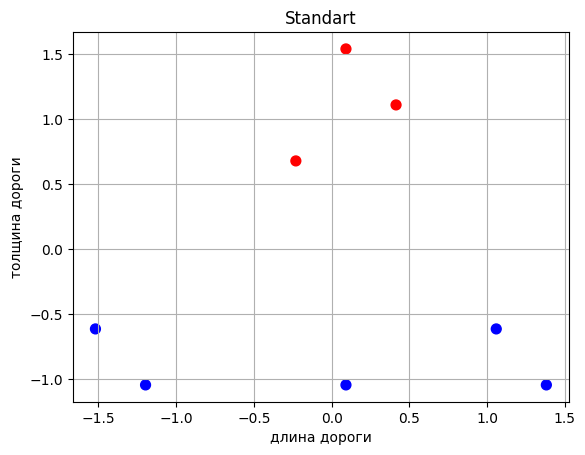

In [97]:
model = KNeighborsClassifier(3)
model.fit(X_st,y)
X_bad = stan.transform([[10000, 1]]) 
y_pred = model.predict(X_bad)

X_new = np.vstack([X_st, X_bad])
y_new = np.hstack([y, y_pred])
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.title('Standart')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Интересный факт, что любые древесные алгоритмы: DecisionTree, RandomForest - не требуют масштабирования. Потому что они работают на пороговых правилах и все признаки у них остаются независимыми.

Резюме: Хороший паттерн думать о масштабировании - `всегда`. Потому что для метрических алгоритмов оно часто необходимо, а для деревьев оно ничего не портит.

Чтобы прочувствовать это на примере можно сходить по [ссылке](https://alexanderdyakonov.wordpress.com/2019/10/31/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/) и прочитать кусочек со слов "Полезным является иллюстрация, как ведут себя коэффициенты при регуляризации"

# Категориальные признаки

Окей, с числовыми признаками разобрались, но ведь доставать необходимую информацию нужно еще и из категориальных признаков. Как с ними можно работать?

## Label Encoding

Рассмотрим выборку UCI bank, в которой большая часть признаков – категориальные.

In [104]:
import pandas as pd
df = pd.read_csv('data/bank_train.csv')
labels = pd.read_csv('data/bank_train_target.csv', header=None)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Мы не можем работать не с числовыми признаками, поэтому естественным решением такой проблемы было бы однозначное отображение каждого значения в уникальное число. Например для столбца job, преобразование admin. -> 0, blue-collar -> 1 и т.д.  
Эту простую операцию приходится делать часто, поэтому в модуле `preprocessing` библиотеки `sklearn` именно для этой задачи реализован класс `LabelEncoder`:

In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

categorical_columns = df.columns[df.dtypes == 'object'] #тип object характеризует признаки, которые нужно преобразовать
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,8,2,3,0,0,0,1,4,1,901,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
1,46,0,1,6,0,2,0,0,1,3,208,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1
2,49,1,1,0,1,2,2,1,4,3,131,5,999,0,1,1.4,94.465,-41.8,4.864,5228.1
3,31,9,1,6,0,0,0,0,3,3,404,1,999,0,1,-2.9,92.469,-33.6,1.044,5076.2
4,42,3,1,6,0,2,0,1,7,1,85,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


In [106]:
df.shape

(27595, 20)

**Обратите внимание**  
Основная проблема такого представления заключается в том, что числовой код создал евклидово представление для данных.  
К примеру, нами неявным образом была введена алгебра над значениями работы - мы можем вычесть работу клиента 1 из работы клиента 2.

In [107]:
df.loc[1].job - df.loc[2].job

-1.0

Конечно же, эта операция не имеет никакого смысла. Но именно на этом основаны метрики близости объектов, что делает бессмысленным применение метода ближайшего соседа на данных в таком виде. Аналогичным образом, применение линейных моделей может давать непредсказуемо плохой (или хороший) результат.

*Помните про различие порядковых (ordinal) и категориальных (categorial) признаков?*

In [108]:
clf_linear = LogisticRegression()
cross_val_score(clf_linear, df, labels).mean()

0.909077731473093

Однако для древесных моделей `LabelEncoding` вполне сгодится.

Для того, чтобы мы смогли применять линейные модели на таких данных нам необходим другой метод, который называется One-Hot Encoding

## One-Hot Encoding

Предположим, что некоторый признак может принимать 10 разных значений. В этом случае one hot encoding подразумевает создание 10 признаков, все из которых равны нулю *за исключением одного*. На позицию, соответствующую численному значению признака мы помещаем 1:

In [97]:
df = pd.read_csv('data/bank_train.csv')
labels = pd.read_csv('data/bank_train_target.csv', header=None)
categorical_columns = df.columns[df.dtypes == 'object']
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [98]:
onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_categorical_columns.columns = [str(x) for x in encoded_categorical_columns.columns]
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
df = df.drop(columns=categorical_columns)

In [100]:
df = pd.concat([encoded_categorical_columns, df], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26,901,1,999,0,1.4,94.465,-41.8,4.961,5228.1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46,208,2,999,0,1.4,93.444,-36.1,4.963,5228.1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49,131,5,999,0,1.4,94.465,-41.8,4.864,5228.1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,31,404,1,999,0,-2.9,92.469,-33.6,1.044,5076.2
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,85,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


In [101]:
df.shape

(27595, 63)

Мы получили 63 столбца - именно столько различных уникальных значений могут принимать категориальные столбцы исходной выборки. Преобразованные с помощью One-Hot Encoding данные начинают обретать смысл для линейной модели:

In [38]:
from sklearn.linear_model import LogisticRegression

clf_linear = LogisticRegression()
cross_val_score(clf_linear, df, labels).mean()

NameError: name 'df' is not defined

Проблема возникает когда, количество различных значений у категориального признака сильно возрастает. В этом случае `OneHotEncoding` станет очень затратным по памяти (даже если будем использовать разряженные таблицы). Но в целом лучше всегда использовать `OneHot`.

## Хэширование признаков (Hashing trick)

Материал взят [отсюда](https://habr.com/ru/company/ods/blog/326418/)

С течением времени категориальные признаки могут принимать новых значений. Это затрудняет использование уже обученных моделей на новых данных. Кроме того, `LabelEncoder` подразумевает предварительный анализ всей выборки и хранение построенных отображений в памяти, что затрудняет работу в режиме больших данных.

Для решения этих проблем существует более простой подход к векторизации категориальных признаков, основанный на хэшировании, известный как hashing trick. 

Хэш-функции могут помочь нам в задаче поиска уникальных кодов для различных значений признака, к примеру:

In [122]:
hash_space = 2

for s in ('university.degree', 'high.school', 'illiterate'):
    print(s, '->', hash(s) % hash_space)

university.degree -> 1
high.school -> 1
illiterate -> 1


Представим, что у нас в выборке есть холостой студент, которому позвонили в понедельник, тогда его вектор признаков будет сформирован аналогично One-Hot Encoding, но в едином пространстве фиксированного размера для всех признаков:

90

In [110]:
hashing_example = pd.DataFrame([{i: 0.0 for i in range(hash_space)}])
for s in ('job=student', 'marital=single', 'day_of_week=mon'):
    print(s, '->', hash(s) % hash_space)
    hashing_example.loc[0, hash(s) % hash_space] = 1
hashing_example

job=student -> 16
marital=single -> 1
day_of_week=mon -> 3


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Стоит обратить внимание, что в этом примере хэшировались не только значения признаков, а пары **название признака + значение признака**. Это необходимо, чтобы разделить одинаковые значения разных признаков между собой, к примеру:

In [111]:
assert hash('no') == hash('no')
assert hash('housing=no') != hash('loan=no')

In [131]:
hash(hash(hash(hash(hash))))

1482416

Может ли произойти коллизия хэш-функции, то есть совпадение кодов для двух разных значений? Нетрудно доказать, что при достаточном размере пространства хэширования это происходит редко, но даже в тех случаях, когда это происходит, это не будет приводить к существенному ухудшению качества классификации или регрессии.

Возможно, вы спросите: "а что за хрень вообще происходит?", и покажется, что при хэшировании признаков страдает здравый смысл. Возможно, но эта эвристика – по сути, единственный подход к тому, чтобы работать с категориальными признаками, у которых много уникальных значений. Более того, эта техника себя хорошо зарекомендовала по результатами на практике. Подробней про хэширование признаков (learning to hash) можно почитать в [этом](https://arxiv.org/abs/1509.05472) обзоре, а также в [материалах](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture06-linclass.pdf) Евгения Соколова.